<a href="https://colab.research.google.com/github/Surajk86808/ML-code/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# there are two input features(interest_rate & unemployment_rate) and one output features(index_price)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
df = pd.read_csv('/content/economic_index_data.csv')

In [18]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2006,9,4.04,7.43,684.43
1,2019,7,9.49,4.76,761.00
2,2014,9,3.91,9.50,635.83
3,2010,8,5.67,5.53,674.07
4,2007,1,7.33,3.22,692.05


In [22]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)
# sheet after deleting data

https://docs.google.com/spreadsheets/d/18nxBuCTv9dNPm1GJw7dp7QaAmafe_wwdLP6FYm1dkNE/edit#gid=0


In [19]:
# dropping unnecessary column
df = df.drop(columns = ['year','month'],axis = 1)
# why axis is equal to 1?
# In pandas, axis=1 refers to the columns of the DataFrame.
# When using the drop method, specifying axis=1 tells pandas to drop columns.
# If you wanted to drop rows, you would use axis=0 (which is the default).

In [23]:
df.head()

,interest_rate,unemployment_rate,index_price
0,4.04,7.43,684.43
1,9.49,4.76,761.00
2,3.91,9.50,635.83
3,5.67,5.53,674.07
4,7.33,3.22,692.05


In [24]:
df.isnull().sum()
# no data with null value

,0
interest_rate,0
unemployment_rate,0
index_price,0


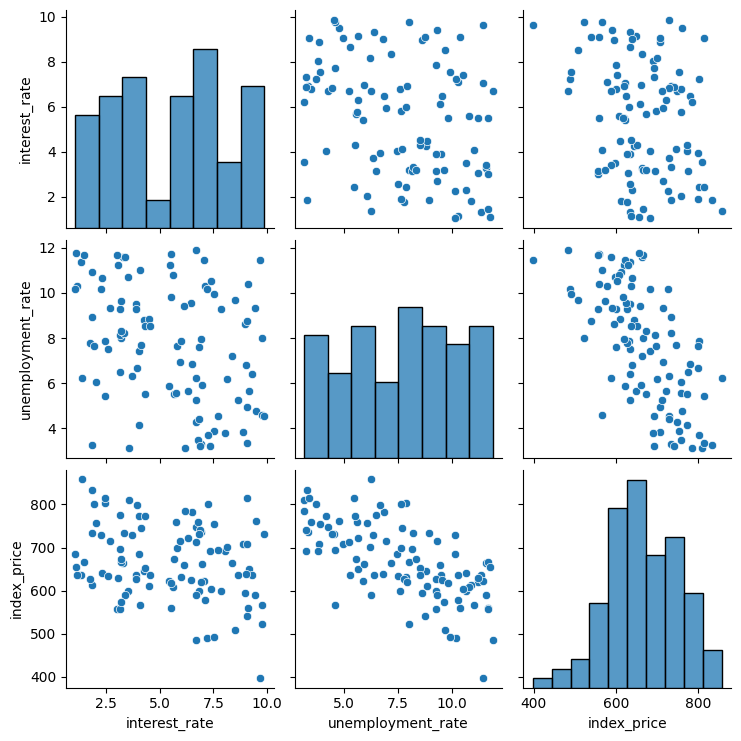

In [26]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
# by seeing graph it is not showing linear relationship but we have to under stand the multiple linear regression so by conserdring only this data we will proceed further

In [28]:
df.corr()
# show opposite behavior one increases other decreases

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.333856,-0.266182
unemployment_rate,-0.333856,1.000000,-0.656004
index_price,-0.266182,-0.656004,1.000000


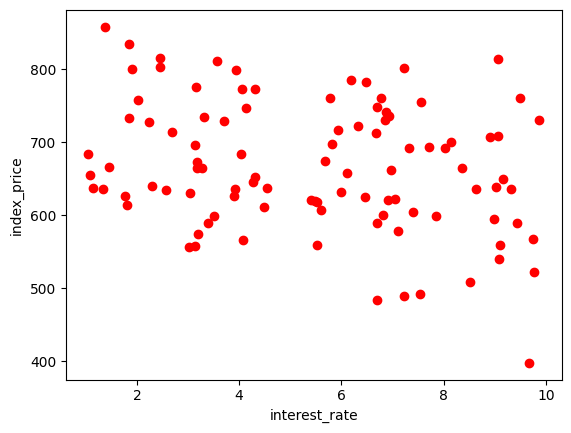

In [44]:
plt.scatter(df['interest_rate'],df['index_price'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('index_price')
plt.show()
# this shows data more closely

In [40]:
# Get the correlation matrix and then select the correlation between index_price and interest_rate
correlation = df.corr().loc['index_price', 'interest_rate']
print(f"The correlation between index_price and interest_rate is: {correlation}")

# You can also access it the other way around:
# correlation = df.corr().loc['interest_rate', 'index_price']
# print(f"The correlation between interest_rate and index_price is: {correlation}")

The correlation between index_price and interest_rate is: -0.26618228045457937


<Axes: xlabel='interest_rate', ylabel='index_price'>

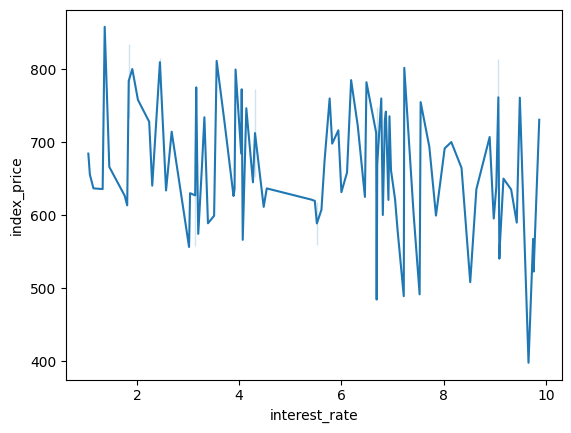

In [41]:
sns.lineplot(x='interest_rate',y='index_price',data=df)
#

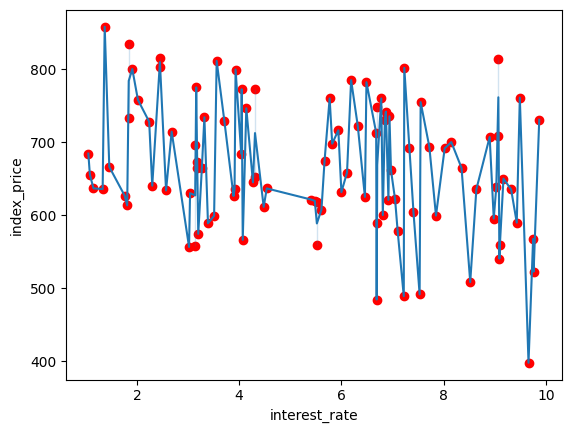

In [43]:
plt.scatter(df['interest_rate'],df['index_price'],color='red')
sns.lineplot(x='interest_rate',y='index_price',data=df)
plt.xlabel('interest_rate')
plt.ylabel('index_price')
plt.show()
# showing neagtive relation from both graph visuals and correaltion also

In [49]:
# independent (input) features and dependent features
x = df[['interest_rate','unemployment_rate']]
# can be written as x = df.iloc[:,:-1] => means except last row everything
y = df[['index_price']]
# can be written as y = df.iloc[:,-1] => means except last row everything

In [52]:
# above and this are same
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [53]:
x.head()

,interest_rate,unemployment_rate
0,4.04,7.43
1,9.49,4.76
2,3.91,9.50
3,5.67,5.53
4,7.33,3.22


In [54]:
y.head()

,index_price
0,684.43
1,761.00
2,635.83
3,674.07
4,692.05


In [56]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

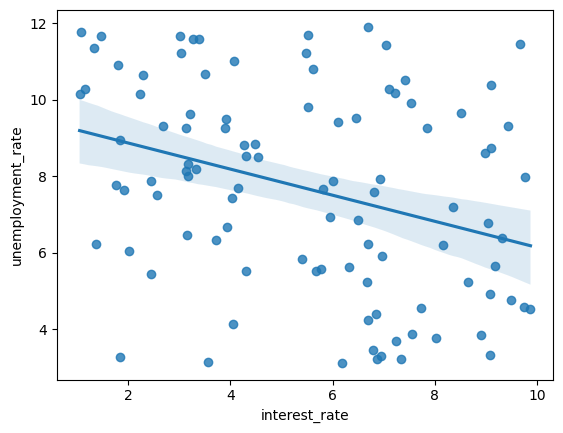

In [63]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)


In [ ]:
# looking on graph it is not like multi linear progression problem but move further


In [67]:
 from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [74]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
# what is scoring => see on sklearn or search on google u wil get it
# what is cv => in notes detail explanation
# why cv => in notes detail explanation


In [77]:
validation_score


array([-1530.98167624, -2614.2834071 , -2776.39709627, -2198.61478757,
       -3794.03912898])

In [78]:
# for average mean mse
np.mean(validation_score)

np.float64(-2582.8632192323143)

In [81]:
y_predict = model.predict(X_test)
y_predict

array([719.85823977, 624.22379339, 568.0106964 , 545.81074687,
       650.13612281, 575.74037671, 697.20355681, 599.97065701,
       733.52862042, 697.24000306, 739.84406407, 658.05092129,
       730.5414906 , 649.50469253, 744.68037759, 752.03441319,
       781.2297098 , 675.32320215, 639.69337813, 643.17992616,
       716.06785534, 604.11040724, 730.12939964, 722.19439248,
       714.52918333])

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
# adjusted r2
adj_r2 = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"Adjusted R-squared: {adj_r2}")

Mean Squared Error (MSE): 2153.6771131006553
Mean Absolute Error (MAE): 40.78786764768078
R-squared (R2): 0.6626450461108839
Adjusted R-squared: 0.6319764139391462


## ASSUMPTIOS
to decide whether model is performing well or not

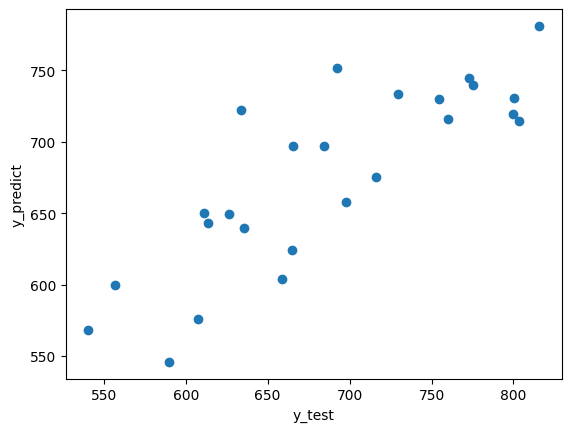

In [87]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

In [90]:
residuals = y_test - y_predict
print(residuals)
# what is residuals => Residuals are the differences between the actual observed values (y_test) and the values predicted by your model (y_predict).

83    79.641760
53    40.536207
70   -27.460696
45    44.089253
44   -38.696123
39    31.899623
22   -31.863557
80   -43.380657
10    -4.048620
0    -12.810003
18    35.215936
30    39.999079
73    69.648509
33   -23.174693
90    28.149622
4    -59.984413
76    34.530290
77    41.006798
12    -3.863378
31   -29.609926
55    43.832145
88    54.349593
26    24.740600
42   -88.274392
69    88.890817
Name: index_price, dtype: float64


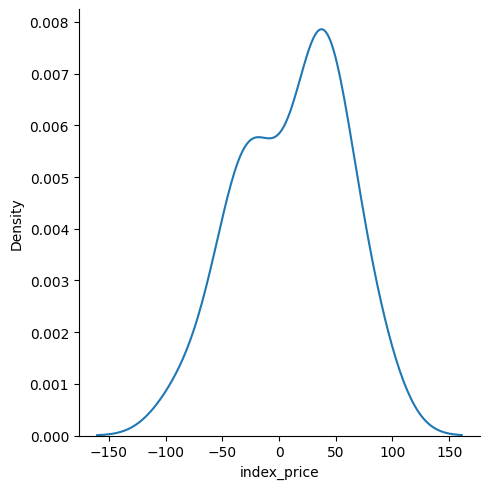

In [92]:
sns.displot(residuals, kind='kde')

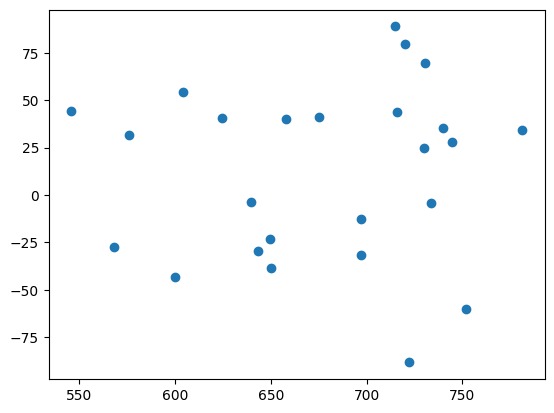

In [93]:
plt.scatter(y_predict,residuals)

In [94]:
# data is slightly slightly uniformly distributed in above graph means it is good if it was not uniformly distributed(means showing some pattern) means model does not perform well

# why uniformly distributed is better?
#r because they mean the model's errors are random and not systematic.

# This suggests the linear model is a good fit and is capturing the underlying relationship in the data well, as the errors are just due to random noise that the model can't explain.

In [99]:
# ols linear regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()


In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.015
Method:                 Least Squares   F-statistic:                             0.4544
Date:                Thu, 17 Jul 2025   Prob (F-statistic):                       0.637
Time:                        20:33:04   Log-Likelihood:                         -593.47
No. Observations:                  75   AIC:                                      1191.
Df Residuals:                      73   BIC:                                      1196.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -47.9833     82.851     -0.579      0.564    -213.104     117.138
x2           -75.7395     82.851     -0.914      0.364    -240.860      89.381
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.204
Skew:                          -0.104   Prob(JB):                        0.903
Kurtosis:                       2.851   Cond. No.                         1.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# predicting some values

print(model.predict([[10, 20]]))


[-1994.62316143]


In [ ]:
# we need to transform to normal as we previously standardized it


In [109]:
# we need to transform to normal as we previously standardized it
# Call the Scaler.transform method using parentheses () and pass the input data inside
print(model.predict(Scaler.transform([[10, 20]])))

[-417.23384832]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
